> Una fintech desea comparar los ingresos mensuales promedio de sus clientes en diferentes regiones del país para diseñar productos financieros más personalizados.

 # Importar librerías necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Estilo de gráficos
sns.set(style="whitegrid")

# Simulacion y limpieza de dataset

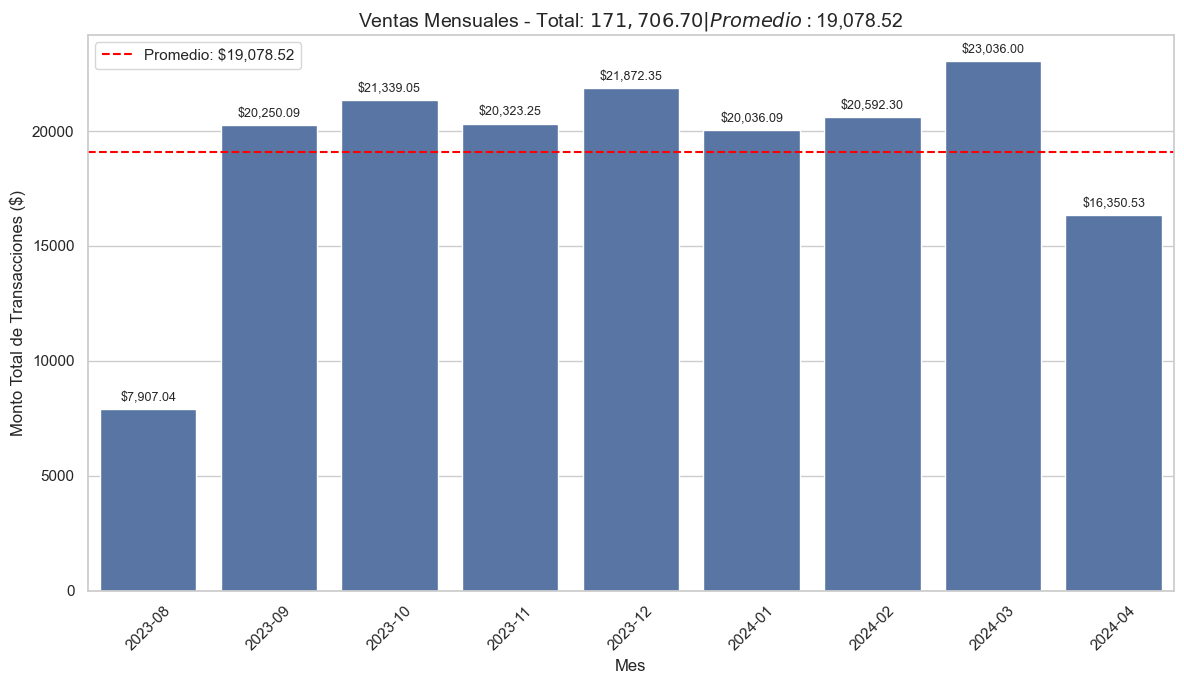

In [16]:

#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer archivo
ruta = r"C:\Users\PRC\Downloads\Clientes_fintech_simulado_limpio.csv"
df = pd.read_csv(ruta, sep=';', encoding='cp1252', on_bad_lines='skip')

# Limpiar y estandarizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convertir columnas necesarias
df['fecha_transaccion'] = pd.to_datetime(df['fecha_transaccion'], dayfirst=True, errors='coerce')
df['monto_producto'] = pd.to_numeric(df['monto_producto'], errors='coerce')

# Eliminar registros con datos faltantes
df = df.dropna(subset=['fecha_transaccion', 'monto_producto'])

# Crear columna 'mes' en formato 'YYYY-MM' para agrupar por mes
df['mes'] = df['fecha_transaccion'].dt.to_period('M').astype(str)

# Agrupar por mes y sumar el monto
ventas_por_mes = df.groupby('mes')['monto_producto'].sum().reset_index()

# Calcular promedio y total para mostrar en gráfico
promedio_mensual = ventas_por_mes['monto_producto'].mean()
total_mensual = ventas_por_mes['monto_producto'].sum()

plt.figure(figsize=(12, 7))
sns.barplot(data=ventas_por_mes, x='mes', y='monto_producto')

# Línea horizontal del promedio
plt.axhline(promedio_mensual, color='red', linestyle='--', label=f'Promedio: ${promedio_mensual:,.2f}')

# Etiquetas encima de cada barra
for i, monto in enumerate(ventas_por_mes['monto_producto']):
    plt.text(i, monto + max(ventas_por_mes['monto_producto']) * 0.01, f"${monto:,.2f}", ha='center', va='bottom', fontsize=9)

plt.title(f'Ventas Mensuales - Total: ${total_mensual:,.2f} | Promedio: ${promedio_mensual:,.2f}', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Monto Total de Transacciones ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Convertir monto_producto a numérico
df['monto_producto'] = pd.to_numeric(df['monto_producto'], errors='coerce')

# Eliminar filas sin distrito, municipio o monto_producto
df = df.dropna(subset=['distrito', 'municipio', 'monto_producto'])

# Agrupar por distrito y municipio sumando monto_producto
ventas_agrupadas = df.groupby(['distrito', 'municipio'])['monto_producto'].sum().reset_index()

# Ordenar primero por distrito y luego por monto_producto descendente
ventas_agrupadas = ventas_agrupadas.sort_values(by=['distrito', 'monto_producto'], ascending=[True, False])

# Crear un eje x combinando distrito y municipio para evitar confusión
ventas_agrupadas['distrito_municipio'] = ventas_agrupadas['distrito'] + " - " + ventas_agrupadas['municipio']

plt.figure(figsize=(14, 8))
sns.barplot(data=ventas_agrupadas, x='distrito_municipio', y='monto_producto')

# Mostrar valores numéricos encima de cada barra
for idx, row in ventas_agrupadas.iterrows():
    plt.text(idx, row['monto_producto'] + max(ventas_agrupadas['monto_producto']) * 0.01,
             f"${row['monto_producto']:,.2f}", ha='center', va='bottom', fontsize=8)

plt.title('Monto Total Transaccion / Distrito y Municipio')
plt.xlabel('Distrito - Municipio')
plt.ylabel('Monto Total Transaccion ($)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

# BOXPLOT

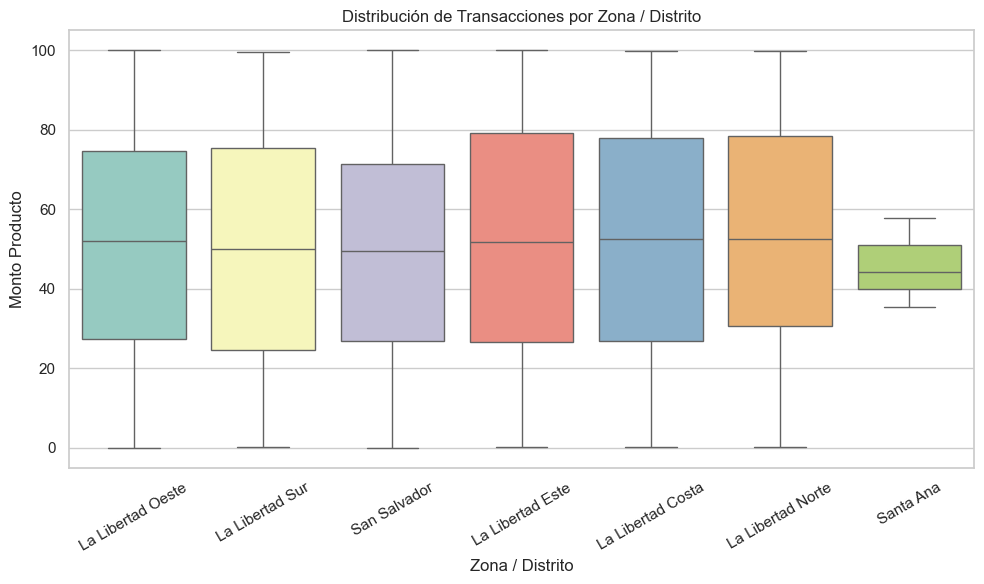

In [3]:
# Filtrar las zonas de interés, agregué 'San Salvador' también
zonas_interes = ['La Libertad Oeste', 'La Libertad Este', 'La Libertad Sur', 'La Libertad Norte', 'La Libertad Costa', 'Santa Ana', 'San Salvador']

df_filtrado = df[df['municipio'].isin(zonas_interes)].copy()

# Eliminar filas sin monto_producto
df_filtrado = df_filtrado.dropna(subset=['monto_producto'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='municipio', y='monto_producto', palette='Set3',hue='municipio')
plt.title('Distribución de Transacciones por Zona / Distrito')
plt.xlabel('Zona / Distrito')
plt.ylabel('Monto Producto')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Curvas de Densidad por region 

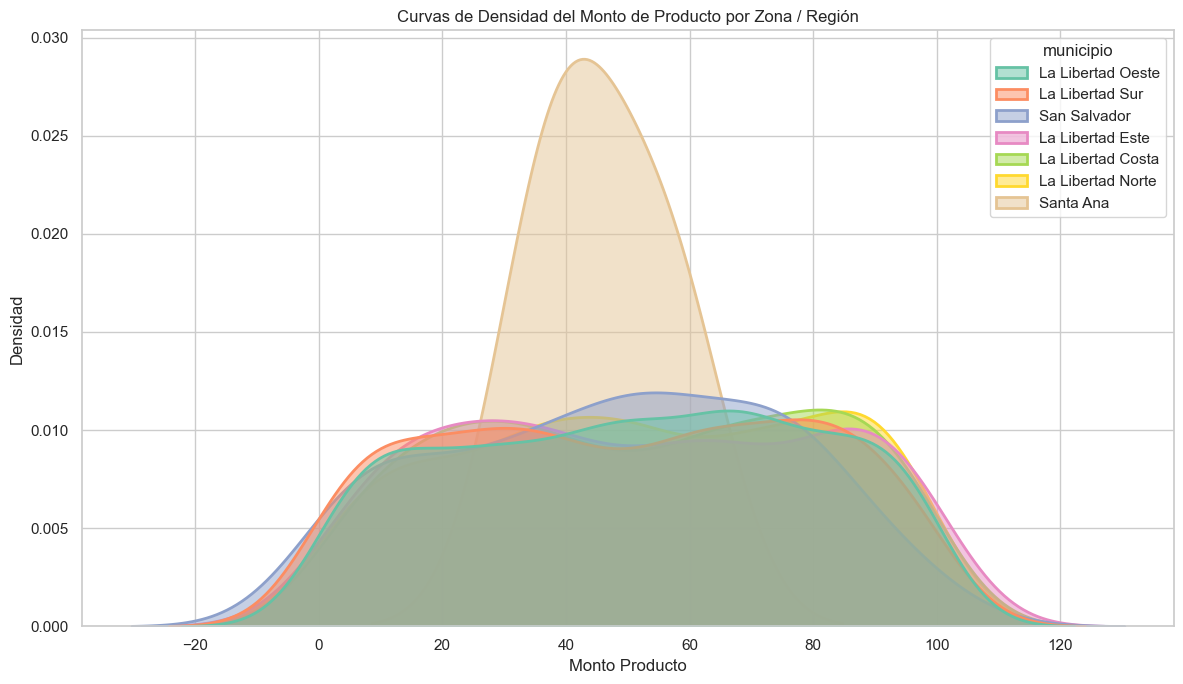

In [4]:
zonas_interes = ['La Libertad Oeste', 'La Libertad Este', 'La Libertad Sur', 
                 'La Libertad Norte', 'La Libertad Costa', 'Santa Ana', 'San Salvador']

# Filtrar y limpiar
df_filtrado = df[df['municipio'].isin(zonas_interes)].copy()
df_filtrado = df_filtrado.dropna(subset=['monto_producto'])

# Crear gráfico KDE
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_filtrado, x='monto_producto', hue='municipio', fill=True, common_norm=False, palette='Set2', alpha=0.5, linewidth=2)

plt.title('Curvas de Densidad del Monto de Producto por Zona / Región')
plt.xlabel('Monto Producto')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()


# Tendencia del ingreso promedio por año y region

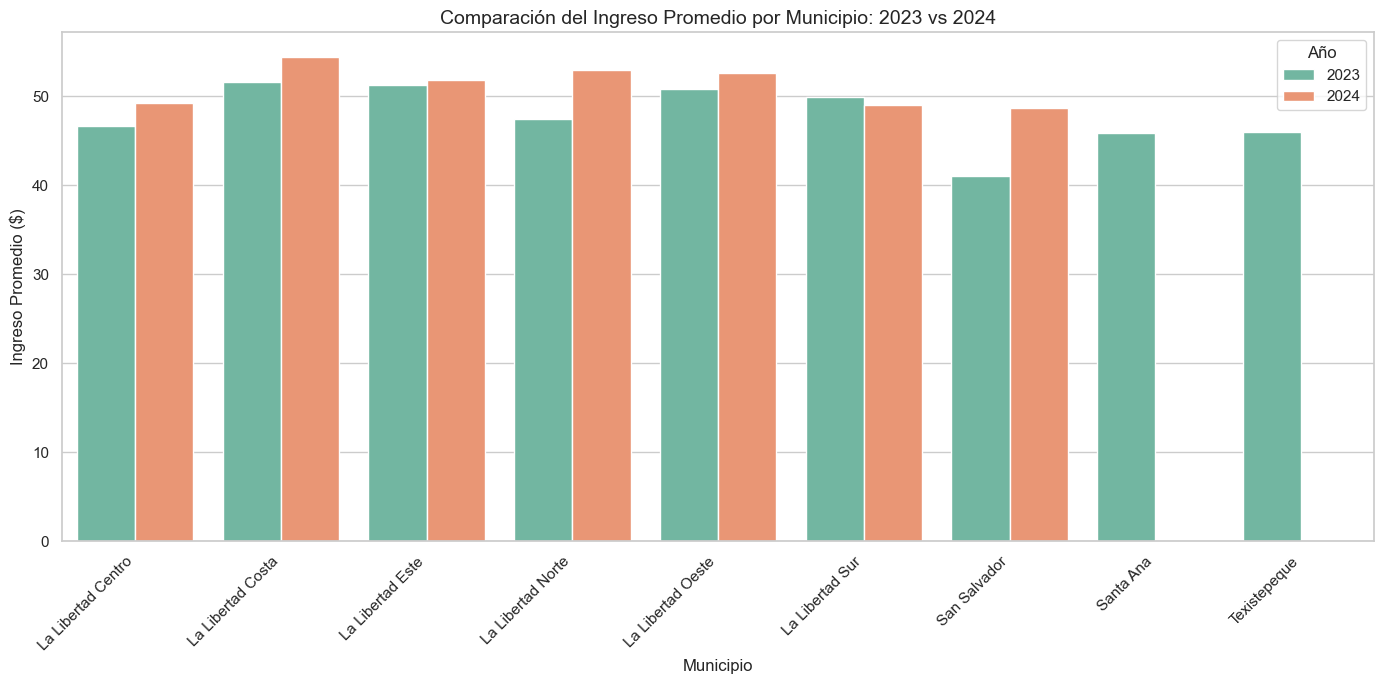

In [5]:

# Convertir fecha y monto
df['fecha_transaccion'] = pd.to_datetime(df['fecha_transaccion'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df['monto_producto'] = pd.to_numeric(df['monto_producto'], errors='coerce')

# Eliminar registros con valores faltantes
df = df.dropna(subset=['fecha_transaccion', 'monto_producto', 'municipio'])

# Extraer año
df['año'] = df['fecha_transaccion'].dt.year

# Filtrar solo años 2023 y 2024
df_filtrado = df[df['año'].isin([2023, 2024])]

# Agrupar por año y municipio y calcular promedio
promedio_anual = (
    df_filtrado.groupby(['año', 'municipio'])['monto_producto']
    .mean()
    .reset_index()
)

# 🟦 Gráfico: Comparación de ingreso promedio por municipio y año
plt.figure(figsize=(14, 7))
sns.barplot(
    data=promedio_anual,
    x='municipio',
    y='monto_producto',
    hue='año',
    palette='Set2'
)

plt.title('Comparación del Ingreso Promedio por Municipio: 2023 vs 2024', fontsize=14)
plt.xlabel('Municipio')
plt.ylabel('Ingreso Promedio ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

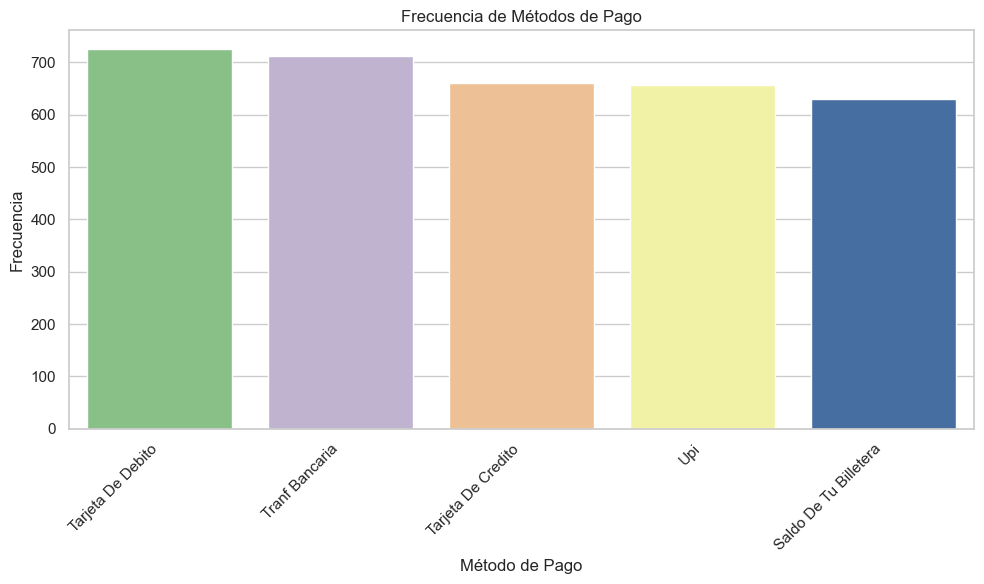

In [6]:
df['metodo_de_pago'] = df['metodo_de_pago'].astype(str).str.strip().str.title()

# Eliminar valores nulos
df = df.dropna(subset=['metodo_de_pago'])

# Contar frecuencia
conteo_metodos = df['metodo_de_pago'].value_counts().reset_index()
conteo_metodos.columns = ['metodo_de_pago', 'frecuencia']

# 📊 Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_metodos, x='metodo_de_pago', y='frecuencia', palette='Accent',hue='metodo_de_pago')

plt.title('Frecuencia de Métodos de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
print(df.columns.tolist())


['codigo', 'fecha_transaccion', 'descripcion', 'nombre_del_comercio', 'direccion', 'distrito', 'municipio', 'metodo_de_pago', 'categori\xada_del_producto', 'monto_producto', 'puntos_de_lealtad', 'transaction_status', 'device_type', 'año']


In [8]:
print(df.head())


      codigo   fecha_transaccion                 descripcion  \
0  204040509 2023-08-19 03:32:00  ERODITA DEL CARMEN HERRERA   
1  204040510 2023-08-19 04:37:00                 ANA GUEVARA   
2  204040511 2023-08-19 05:52:00              MARLENE MOLINA   
3  204040512 2023-08-19 06:35:00           CARMEN MONTERROSA   
4  204040513 2023-08-19 06:36:00              ISABEL CORNEJO   

          nombre_del_comercio  \
0  HERRERA ERODITA DEL CARMEN   
1                  TDA. ANITA   
2                 TDA MADIZON   
3          TDA. CARLOS MIGUEL   
4       TDA ESTRELLA DE DAVID   

                                           direccion distrito  \
0  URB CAMPOS VERDES I AV CAMPOS VERDES SENDA 9 O...    Colon   
1  URB. CAMPOS VERDES 1 AV. PPAL. POLIG. 7 CASA # 27    Colon   
2                  COL CINCO CEDROS CLL PPAL CASA 10    Colon   
3        COL. LAS MORITAS CALLE 17 DE MARZO CASA S/N    Colon   
4  URB NUEVO LOURDES SENDA 2 BLOCK 4A #20 ENTRADA...    Colon   

           municipio     